# **Object Detection: Template Matching**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full=cv2.imread("../DATA/sammy.jpg")
full=cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

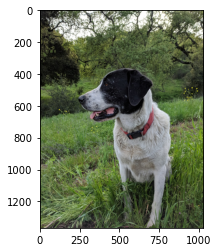

In [3]:
plt.imshow(full)

In [4]:
face=cv2.imread("../DATA/sammy_face.jpg")
face=cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

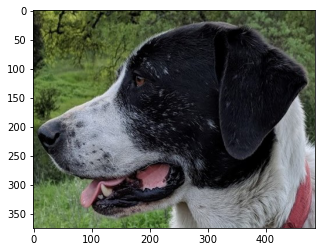

In [5]:
plt.imshow(face)

In [6]:
face.shape

(375, 486, 3)

In [7]:
full.shape

(1367, 1025, 3)

In [8]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

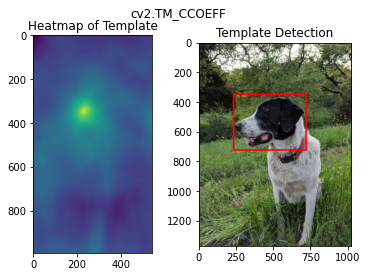

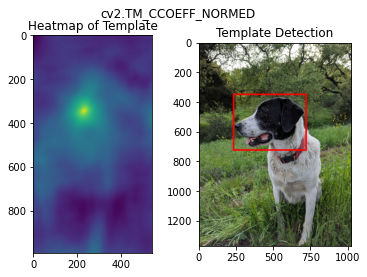

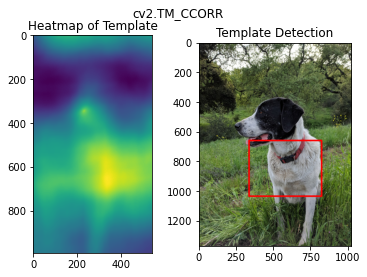

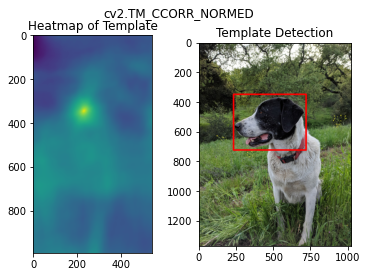

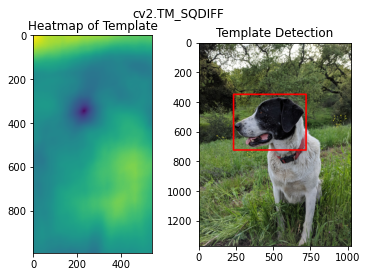

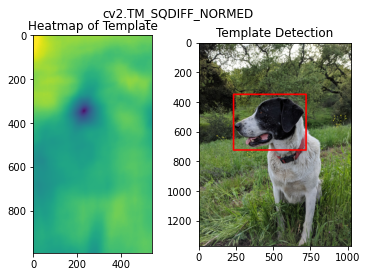

In [10]:
for m in methods:
    
    full_copy=full.copy()
    method=eval(m)
    #eval() refer
    
    #template matching
    res=cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    
    else:
        top_left=max_loc
    
    height, width, channels=face.shape
    bottom_right=(top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap of Template")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Template Detection")
    
    plt.suptitle(m)
    
    plt.show()
    
    print("\n")
    print("\n")
    